In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('../DataSets/data_set_dra_updated.csv')

x = pd.DataFrame(dataset.iloc[:, 0:5].values)
y = dataset.iloc[:, 5].values

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [4]:
from sklearn.tree import DecisionTreeRegressor

DTReg = DecisionTreeRegressor()

DTReg.fit(x_train,y_train)

DecisionTreeRegressor()

In [5]:
y_pred = DTReg.predict(x_test)

In [6]:
# Prediction Metrics

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error

MSE = mse(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
MAX_ERROR = max_error(y_test, y_pred);
MEAN_ABSOLUTE_ERROR = mean_absolute_error(y_test, y_pred)


print("Mean Squared Error", MSE)
print("R-Squared: ", R2)
print("Max Error", MAX_ERROR);
print("Mean Absolute Error", MEAN_ABSOLUTE_ERROR);

Mean Squared Error 0.5090143792194908
R-Squared:  0.9736698897989442
Max Error 29.129007473314598
Mean Absolute Error 0.1604728085684071


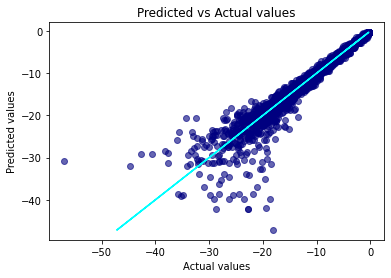

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x=y_test, y=y_pred, c='navy', alpha=0.6)
plt.plot(y_pred, y_pred,color='cyan')
plt.title('Predicted vs Actual values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [9]:
# Data Samples

d1 = [14.10, 14.55, 2.25, 2.6, 2.42] #HFSS S11 = -0.37
d2 = [13.04, 13.30, 2.3, 2.7, 1.84] # HFSS S11 = -0.43
d3 = [13.19, 13.74, 2.7, 2.45, 1.95] # HFSS S11 = -0.44
d4 = [14.42, 13.12, 2.4, 2.8, 2.41] # HFSS S11 = -0.51
d5 = [13.86, 14.57, 2.8, 2.1, 2.56] #HFSS S11 = -0.77

# Predictions
preds = DTReg.predict([d1,d2,d3,d4,d5])

print("Predictions", preds);

Predictions [-0.29540848 -0.40762225 -0.42325771 -0.65103981 -0.46918247]


In [10]:
# Generating random data sets

import numpy
import pandas

SAMPLE_SIZE = 10

def randomSample(low, high, size):
    rand_rad = numpy.random.uniform(low, high, size)
    for i in range(0, rand_rad.size):
        rand_rad[i] = round(rand_rad[i], 2)
    return rand_rad

rand_rad = randomSample(13, 15, SAMPLE_SIZE)
rand_height = randomSample(13, 15, SAMPLE_SIZE)
rand_freq = randomSample(1, 5, SAMPLE_SIZE)
rand_w1 = randomSample(2.5, 3.5, SAMPLE_SIZE)
rand_w2 = randomSample(2.5, 3.5, SAMPLE_SIZE)

rand_x = []
for i in range(0,SAMPLE_SIZE):
    rand_x.append([rand_height[i], rand_rad[i], rand_w1[i], rand_w2[i], rand_freq[i]])

y_pred_rand = DTReg.predict(rand_x)

output = []
for i in range(0, SAMPLE_SIZE):
    output.append([rand_height[i], rand_rad[i], rand_w1[i], rand_w2[i], rand_freq[i], y_pred_rand[i]])
    
# Creating Dataframe
output_df = pandas.DataFrame(output, columns= ["Height", "Radius","W1", "W2", "Frequency", "S11"])
print("Predicted Values for random samples\n")
print(output_df)

Predicted Values for random samples

   Height  Radius    W1    W2  Frequency        S11
0   13.01   13.16  2.54  2.70       1.51  -0.386939
1   14.62   15.00  3.45  2.73       3.31  -9.562199
2   14.66   13.94  3.27  2.75       3.79  -2.259321
3   14.41   14.17  3.49  2.53       1.63  -0.396802
4   14.94   13.02  3.35  2.68       2.22  -0.783771
5   13.87   14.36  3.03  3.02       1.84  -0.435443
6   14.14   13.88  3.05  2.89       3.30 -12.984230
7   14.98   14.63  2.96  3.03       4.28  -3.008940
8   14.70   13.02  3.09  2.80       2.55  -0.336081
9   13.23   14.62  3.34  3.28       1.81  -0.409112
